# o3 mini with v2.17 prompt

This notebook outlines the steps undertook to generate a prediction using o3 mini with prompt from 2/17/25.

The prompt is adjusted from the other v2.17 prompts to better suite the reasoning model's style based on the documentation.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import reasoning_instructions_v217
MODEL_ID = "o3-mini-2025-01-31"
SYSTEM_PROMPT = reasoning_instructions_v217

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 7
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 50.3 s, sys: 8.27 s, total: 58.6 s
Wall time: 39min 45s


[{'0001.91306_cites_88061.txt': {'model': 'o3-mini-2025-01-31',
   'input_tokens': 2470,
   'output_tokens': 993,
   'prediction': 'yes',
   'confidence': 0.98,
   'rationale': "The passage explicitly states that the original decision in Texas v. White, 7 Wall. 700, has been 'questioned and limited in important particulars' and that its position 'must be regarded as overruled.' This constitutes an explicit negative action by the Acting Case towards the Target Case.",
   'raw_results': '{\n  "overruled": "yes",\n  "confidence": 0.98,\n  "rationale": "The passage explicitly states that the original decision in Texas v. White, 7 Wall. 700, has been \'questioned and limited in important particulars\' and that its position \'must be regarded as overruled.\' This constitutes an explicit negative action by the Acting Case towards the Target Case."\n}'}},
 {'0002.91306_cites_88994.txt': {'model': 'o3-mini-2025-01-31',
   'input_tokens': 2184,
   'output_tokens': 1487,
   'prediction': 'no',
  

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,o3-mini-2025-01-31,2470,993,yes,0.98,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.98..."
1,0002.91306_cites_88994.txt,o3-mini-2025-01-31,2184,1487,no,0.95,The text references Vermilye v. Adams Express ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,o3-mini-2025-01-31,1721,1371,no,0.95,The passage reaffirms and repeats the rules fr...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0005.91306_cites_88693.txt,o3-mini-2025-01-31,1699,1999,no,0.95,The passage cites Huntington v. Texas as prece...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
4,0004.91306_cites_88240.txt,o3-mini-2025-01-31,1697,1734,no,0.95,The passage indicates that Texas v. Hardenberg...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/10.o3_mini_v217_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/6.gpt/10.o3_mini_v217_prompt.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o3-mini-2025-01-31,2470,993,yes,0.98,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.98..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o3-mini-2025-01-31,2184,1487,no,0.95,The text references Vermilye v. Adams Express ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o3-mini-2025-01-31,1721,1371,no,0.95,The passage reaffirms and repeats the rules fr...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o3-mini-2025-01-31,1697,1734,no,0.95,The passage indicates that Texas v. Hardenberg...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o3-mini-2025-01-31,1699,1999,no,0.95,The passage cites Huntington v. Texas as prece...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     932
yes    152
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

3041175

In [15]:
eval_df["output_tokens"].sum()

2208300

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.94      0.94      0.94       935
         Yes       0.64      0.65      0.64       149

    accuracy                           0.90      1084
   macro avg       0.79      0.80      0.79      1084
weighted avg       0.90      0.90      0.90      1084



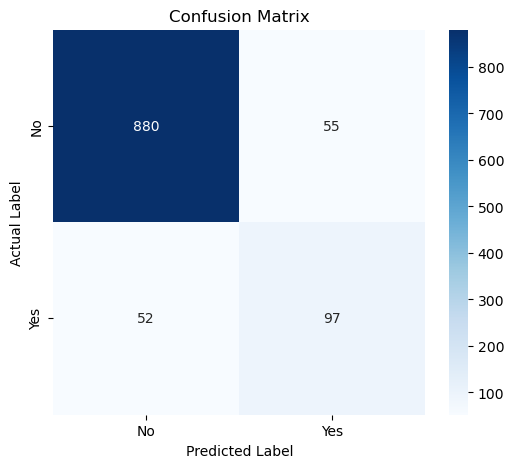

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.90
Precision: 0.64
Recall: 0.65
F-score: 0.64
Specificity: 0.94
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 97
True negatives: 880
False positives: 55
False negatives: 52


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

55

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

52

# Save the evaluation df

In [22]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o3-mini-2025-01-31,2470,993,yes,0.98,The passage explicitly states that the origina...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.98..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o3-mini-2025-01-31,2184,1487,no,0.95,The text references Vermilye v. Adams Express ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o3-mini-2025-01-31,1721,1371,no,0.95,The passage reaffirms and repeats the rules fr...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o3-mini-2025-01-31,1697,1734,no,0.95,The passage indicates that Texas v. Hardenberg...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o3-mini-2025-01-31,1699,1999,no,0.95,The passage cites Huntington v. Texas as prece...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."


In [23]:
eval_df.to_csv("predictions/6.gpt/10.o3_mini_v217_prompt_eval.csv", index=False)